In [1]:
import warnings,time,sys
import numpy as np
import pandas as pd
from datetime import date,datetime

# local library
st = time.time()

start_date="2006-04-01"
end_date="2015-03-31"
    # use Open data


In [2]:
input_data=pd.read_csv("TXF_day.CSV")
i=datetime.strptime(input_data['date'][0], "%Y/%m/%d").strftime("%Y-%m-%d")
for i in range(len(input_data['date'])):
    t=datetime.strptime(input_data['date'][i], "%Y/%m/%d").strftime("%Y-%m-%d")
    input_data=input_data.set_value(i,'date',t)

#input_data=input_data.set_index(['date'])    
#input_data.drop('date', axis=1, inplace=True)

input_data.drop('open', axis=1, inplace=True)
input_data.drop('high',axis=1, inplace=True)
input_data.drop('low', axis=1, inplace=True)
input_data.drop('quote', axis=1, inplace=True)
input_data.drop('quote_b(3)', axis=1, inplace=True)
input_data.drop('quote_a(3)', axis=1, inplace=True)
input_data.drop('BIAS(5)', axis=1, inplace=True)

input_data=input_data.rename(columns={'close': 'TXF'})
input_data['long']=np.nan
input_data['short']=np.nan

input_data.head()


date   TXF  long  short
0  1995-01-10  6756   NaN    NaN
1  1995-01-11  6777   NaN    NaN
2  1995-01-12  6609   NaN    NaN
3  1995-01-13  6582   NaN    NaN
4  1995-01-14  6511   NaN    NaN

date   TXF    long  short
60  1995-03-30  6514  6514.0    NaN
61  1995-03-31  6524  6514.0    NaN
62  1995-04-01  6573  6514.0    NaN
63  1995-04-06  6575  6514.0    NaN
64  1995-04-07  6518  6514.0    NaN

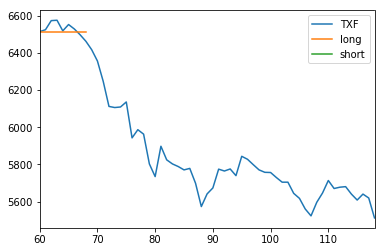

In [7]:
%matplotlib inline

buy_point=input_data['TXF'].iloc[60]
for i in range(60,69):
    input_data=input_data.set_value(i,'long',buy_point)
a=input_data.iloc[60:119]
fig=a.plot().get_figure()
#fig=b.get_figure()
input_data.iloc[60:69].head()

# Image to gray

In [8]:
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])
def smallerimg(img):
    return img[35:-35,53:-40,:]
input_data.index

RangeIndex(start=0, stop=5626, step=1)

# Convert to Image


In [10]:
from PIL import Image, ImageDraw
im_h = im_w =80
im = Image.new('L', (im_h, im_w)) 
draw = ImageDraw.Draw(im)

h= input_data['TXF'].iloc[:59].max()- input_data['TXF'].iloc[:59].min()
down = input_data['TXF'].iloc[:59].min()
high = input_data['TXF'].iloc[:59].max()
for i in range(1,60):
    #p1 = (input_data['TXF'][i-1]-down)*(im_h/h)
    #p2= (input_data['TXF'][i]-down)*(im_h/h)
    p1= (high-input_data['TXF'][i-1])*(im_h/h)
    p2= (high-input_data['TXF'][i])*(im_h/h)
    
    r_w = im_w/60
    draw.line(((i-1)*r_w, p1 ,i*r_w , p2), fill=255)
im.show()

In [4]:
from keras import initializations
from keras.initializations import normal, identity
from keras.models import model_from_json
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.optimizers import SGD , Adam
import tensorflow as tf

im_h = im_w =80
img_channels = 4
LEARNING_RATE = 1e-4

def buildmodel():
    print("Now we build the model")
    model = Sequential()
    model.add(Convolution2D(32, 8, 8, subsample=(4, 4), border_mode='same',input_shape=(im_h , im_w,img_channels)))  #80*80*4
    model.add(Activation('relu'))
    model.add(Convolution2D(64, 4, 4, subsample=(2, 2), border_mode='same'))
    model.add(Activation('relu'))
    model.add(Convolution2D(64, 3, 3, subsample=(1, 1), border_mode='same'))
    model.add(Activation('relu'))
    model.add(Flatten())
    model.add(Dense(512))
    model.add(Activation('relu'))
    model.add(Dense(2))
   
    adam = Adam(lr=LEARNING_RATE)
    model.compile(loss='mse',optimizer=adam)
    print("We finish building the model")
    return model

Using TensorFlow backend.


In [5]:
m=buildmodel()

Now we build the model
We finish building the model


In [13]:
arr=np.array(im)
s_t = np.stack((arr, arr, arr, arr), axis=2)
s_t = s_t.reshape(1, s_t.shape[0], s_t.shape[1], s_t.shape[2])

m.predict(s_t)

array([[ 8.33793831,  9.35702133]], dtype=float32)